In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

MNIST Fashion Dataset nalazi se zajedno sa keras bibliotekom tako da mozemo direktno da ga procitamo
ima 60 000 slika za trening i 10 000 slika za test

In [50]:
fashion_minst = keras.datasets.fashion_mnist # Ucitavamo dataset

(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data() #Automatski rasporedjujemo dataset u trenig i test skupove

In [51]:
train_images.shape # Imamo 60 000 slika, koje imaju 28 sa 28 pixela
#type(train_images) #koji je tip promenjlive

(60000, 28, 28)

In [52]:
train_images[0,23,23] #Uzmi sliku 0 i daj vrednost pixela na redu 23 i koloni 23. U nasem slucaju ove slike su Greyscale tj 0 Crna 254 Bela

194

In [53]:
train_labels[:10] # U nasem slucaju nas label ima vrednosti od 0-9. Tj. svaki broj predstavlja jednu vrstu odece

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [54]:
# Ovo su te klase koje odgovaraju na predhodne brojeve
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

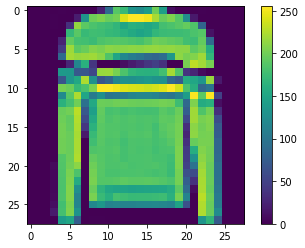

In [55]:
plt.figure() # Kreiraj figuru
plt.imshow(train_images[5]) # Prikazivanje slike
plt.colorbar() # legenda sa strane sa nivoom boja
plt.grid(False) # da li je grid prikazan, po default je False
plt.show()

In [56]:
# Obradjujemo podatke radi lakse obrade podataka prilikom treninga u nasem slucaju
#Grayscale boja varira od 0 do 255, znaci delimo sve sa 255, da bi nase vrednosti 
#posle bile izmedju 0 i 1. Ovo je zeljeni cilj za vecinu neural networks
train_images = train_images / 255.0
test_images = test_images / 255.0

In [57]:
model = keras.Sequential([                       # Informacije Sekvencijalno prolazi kroz NN, nije rekurzivna
    keras.layers.Flatten(input_shape=(28,28)),   # 1 Layer, prvi sloj, Input Layer, Koristimo Flatten da bi nasu sliku koja je 28 x 28 pretvorili u 1 x 784
    keras.layers.Dense(128, activation="relu"),  # 2 Layer, drugi sloj, Hidden Layer,128 noda Koristimo Dense svaki node je konektovan na svaki sledeci, i AF je relu
    keras.layers.Dense(10, activation="softmax") # 3 Layer, treci sloj, Output Layer, 10 noda jer imamo samo 10 clasa, AF je softmax tj. zbih rezultata outputa ce uvek biti 1
])                                               # Npr. rezultat NN ce biti 10 vrednosti izmedju 1 i 0, gde ako se one saberu taj zbir ce biti jednak 1

In [58]:
# Posle pravljenja modela moramo da napravimo i optimizator naseg modela
model.compile(
    optimizer="adam", # Optimizator koji radi Gradient Desent
    loss="sparse_categorical_crossentropy", # Loss koji ce koristiti GD da optimizuje model
    metrics=["accuracy"] # Na osnovu cega ce vrsiti optimizaciju
)

In [59]:
train_images.shape

(60000, 28, 28)

In [60]:
model.fit(train_images, train_labels, epochs=1) # Ovde treniramo model tj Fit-ujemo ga. Ovde nema input function jer keras to automatski radi za nas

1875/1875 [==============================] - 3s 1ms/step - loss: 0.5025 - accuracy: 0.8236


Ovde smo dobili koliki je nas Accuracy na trening skupu ali nama treab accuracy na test skupu

In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 0s 981us/step - loss: 0.4307 - accuracy: 0.8449
Test Accuracy:  0.8449000120162964


In [62]:
#Posto je ovde Acc 0.88 a u trenigu je bio 0.90 to znaci da je nas model Overfitted, tj. model 
#model je vidjao vise istih slika i postao bolji ne u pronalazenju bilo kojih slika nego samo tih
#nekoliko slika

Predicted class: Trouser
Laben: Trouser


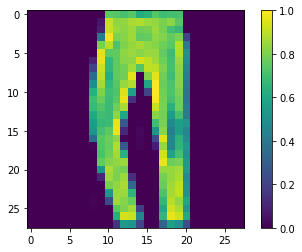

In [67]:
#Sada kata smo istrenirali nas model treba da uradimo neku predikciju
pic_num = 5

prediction = model.predict(test_images)
print("Predicted class: " + class_names[np.argmax(prediction[pic_num])])
print("Laben: " + class_names[test_labels[pic_num]])
plt.figure()
plt.imshow(test_images[pic_num])
plt.colorbar()
plt.grid(False)
plt.show()

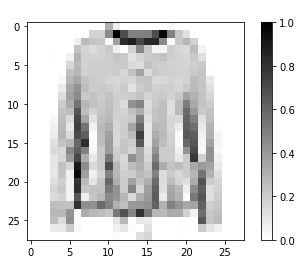

In [64]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
